In [58]:
import pandas as pd
from pathlib import Path
import numpy as np

filename_patient = Path('..') / 'data' / 'patient.csv'
filename_station = Path('..') / 'data' / 'station.csv'
filename_observation = Path('..') / 'data' / 'observation.csv'

if not filename_patient.exists():
    raise FileNotFoundError(f'File patient.csv is not found')

if not filename_station.exists():
    raise FileNotFoundError(f'File station.csv is not found')

if not filename_observation.exists():
    raise FileNotFoundError(f'File observation.csv is not found')

patient_df = pd.read_csv(filename_patient, sep='\t')

observation_df = pd.read_csv(filename_observation, sep='\t')

station_df = pd.read_csv(filename_station, sep='\t')

In [59]:
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,Zänkerweg 6-2\n75317 Pößneck,NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51\nPiratininga\n99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike\nLake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run\nWest Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [60]:
patient_df.shape

(2154, 13)

In [61]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blood_group       2154 non-null   object 
 1   user_id           2154 non-null   int64  
 2   company           2154 non-null   object 
 3   registration      2154 non-null   object 
 4   address           1831 non-null   object 
 5   job               646 non-null    object 
 6   ssn               2154 non-null   object 
 7   username          2154 non-null   object 
 8   residence         0 non-null      float64
 9   name              2154 non-null   object 
 10  current_location  2046 non-null   object 
 11  mail              2154 non-null   object 
 12  station_ID        2154 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 218.9+ KB


In [62]:
patient_df.describe()

,user_id,residence,station_ID
count,2154.000000,0.0,2154.000000
mean,1073.106778,NaN,368.611421
std,626.165384,NaN,213.766990
min,0.000000,NaN,0.000000
25%,532.250000,NaN,178.250000
50%,1072.500000,NaN,361.000000
75%,1608.500000,NaN,549.000000
max,2153.000000,NaN,745.000000


In [63]:
patient_df.isna().sum().sort_values(ascending=False)

residence           2154
job                 1508
address              323
current_location     108
blood_group            0
user_id                0
company                0
registration           0
ssn                    0
username               0
name                   0
mail                   0
station_ID             0
dtype: int64

In [64]:
patient_df.nunique(dropna=True).sort_values(ascending=False)

ssn                 2154
mail                2149
username            2130
name                2099
current_location    2046
company             1956
registration        1949
address             1831
user_id             1360
station_ID           696
job                  390
blood_group            8
residence              0
dtype: int64

In [65]:
patient_df['address'] = patient_df['address'].str.replace('\n', ', ').str.replace('\r', '')
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [66]:
patient_df['registration'] = (
    patient_df['registration']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

patient_df['registration'] = pd.to_datetime(
    patient_df['registration'],
    errors='coerce',
    format='mixed'
)
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024-06-13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,2024-10-11,"Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,2022-10-19,島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019-01-19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019-11-10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [67]:
patient_df['residence'].unique()

array([nan])

In [68]:
patient_df = patient_df.drop(columns=['residence'])

patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024-06-13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,2024-10-11,"Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,2022-10-19,島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019-01-19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019-11-10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [69]:
filename = Path('..') / 'data' / 'observation.csv'

if not filename.exists():
    raise FileNotFoundError(f'File is not found: {filename}')

observation_df = pd.read_csv(filename, sep='\t')

observation_df.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,96.491498,75.410035,11.966950,14.781380,38.814201,60.447244,130.452955,94.990567,34.465008,8.254118,...,4.000203,80.401412,36.370500,51.040438,27.830965,0.286386,26.305034,1.0,6.84019,79.87116
1,97.657620,90.314511,9.500074,16.118786,42.528828,60.183638,106.651627,107.891610,37.058675,9.514584,...,4.073080,63.098636,26.194633,50.549199,51.169605,0.257752,28.282578,1.0,-29.29750,-51.50361
2,96.528162,79.127147,11.268005,15.921648,41.262696,77.600291,131.520657,109.497981,36.934570,10.435298,...,4.000805,47.467045,47.915005,44.390213,45.069050,0.255257,34.529833,1.0,9.33370,122.86370
3,98.195660,83.015909,14.140633,14.348950,40.283494,59.027420,144.702141,101.915115,34.855279,8.896198,...,4.003649,36.139538,51.788271,55.517932,29.478669,0.255097,36.136759,1.0,33.54428,-84.23381
4,97.573527,83.388999,9.058458,17.513347,39.844401,49.965222,111.977370,98.441554,36.833986,7.009457,...,4.004251,47.409300,86.559604,40.041646,53.128176,0.286358,23.648813,1.0,50.80019,7.20769


In [70]:
filename = Path('..') / 'data' / 'station.csv'

if not filename.exists():
    raise FileNotFoundError(f'File is not found: {filename}')

station_df = pd.read_csv(filename, sep='\t')

station_df.head()

,station,longitude,location,QoS,latitude,revision
0,Kenda,86.51499,Asia/Kolkata,good,23.19590,17 Jun 2018
1,Canton,-83.48216,America/Detroit,good,42.30865,2022/10/10
2,Zaysan,84.87144,Asia/Almaty,good,47.46657,2016/11/06
3,Shushary,30.38167,Europe/Moscow,good,59.80917,2022/09/10
4,Cheraga,2.95924,Africa/Algiers,good,36.76775,07 Jan 2024


In [71]:
station_df[['continent', 'city']] = station_df['location'].str.rsplit('/', n=1, expand=True)
station_df = station_df.drop(columns=['location'])
station_df.head()

,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,17 Jun 2018,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022/10/10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016/11/06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022/09/10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,07 Jan 2024,Africa,Algiers


In [72]:
station_df['revision'] = (
    station_df['revision']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

station_df['revision'] = pd.to_datetime(
    station_df['revision'],
    errors='coerce',
    format='mixed'  
)
station_df.head()


,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,2018-06-17,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022-10-10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016-11-06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022-09-10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,2024-01-07,Africa,Algiers


In [73]:
print("Patient columns:", patient_df.columns.tolist())
print("Station columns:", station_df.columns.tolist())
print("Observation columns:", observation_df.columns.tolist())

Patient columns: ['blood_group', 'user_id', 'company', 'registration', 'address', 'job', 'ssn', 'username', 'name', 'current_location', 'mail', 'station_ID']
Station columns: ['station', 'longitude', 'QoS', 'latitude', 'revision', 'continent', 'city']
Observation columns: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']


Numeric columns in observation:
['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']


,SpO₂,HR,RR,EtCO₂,FiO₂,BP,Skin Temperature,CO,SV,PVI
count,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000
mean,97.409019,83.114699,16.137013,40.556298,59.457167,103.600513,35.711715,4.036754,81.623276,15.227846
std,0.740892,5.573951,1.032176,1.269783,10.767989,3.591584,0.605758,0.139381,5.238924,1.507258
min,95.000000,60.000000,12.000000,35.000000,21.000000,90.000000,33.000000,4.000000,60.000000,10.000000
25%,96.834760,78.810257,15.452009,39.722449,52.246367,101.190550,35.306966,4.000704,78.121143,14.101250
50%,97.315208,82.950379,16.138621,40.605869,59.506589,103.589050,35.711292,4.003555,81.650628,15.315151
75%,98.031972,87.429912,16.830714,41.417182,66.658016,106.009289,36.111692,4.022252,85.178118,16.503430
max,100.000000,100.000000,20.000000,45.000000,100.000000,120.000000,38.000000,8.000000,100.000000,20.000000


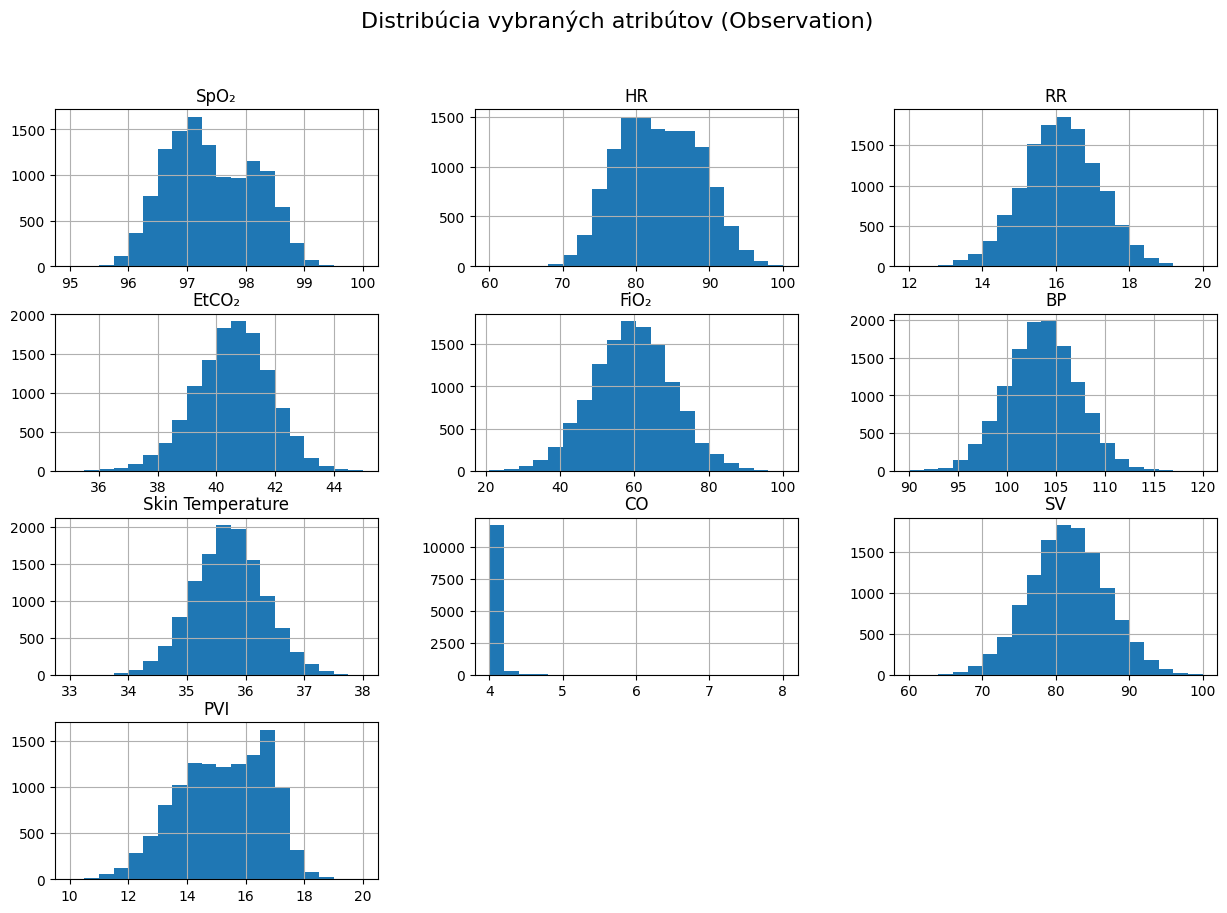


Kontrola rozsahu hodnôt:

SpO₂: 0 pod (80), 0 nad (100), spolu 12133 meraní.
HR: 0 pod (40), 0 nad (180), spolu 12133 meraní.
RR: 0 pod (8), 0 nad (30), spolu 12133 meraní.
EtCO₂: 0 pod (20), 0 nad (60), spolu 12133 meraní.
FiO₂: 0 pod (20), 0 nad (100), spolu 12133 meraní.
BP: 0 pod (40), 0 nad (200), spolu 12133 meraní.
Skin Temperature: 0 pod (30), 0 nad (40), spolu 12133 meraní.
CO: 0 pod (3), 0 nad (8), spolu 12133 meraní.
SV: 0 pod (30), 0 nad (120), spolu 12133 meraní.
PVI: 0 pod (0), 0 nad (100), spolu 12133 meraní.


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Проверим, какие атрибуты числовые ---
print("Numeric columns in observation:")
print(observation_df.select_dtypes(include=['number']).columns.tolist())

# --- Выберем 10+ значимых числовых атрибутов из observation_df ---
columns_to_analyze = [
    'SpO₂', 'HR', 'RR', 'EtCO₂', 'FiO₂',
    'BP', 'Skin Temperature', 'CO', 'SV', 'PVI'
]

# --- Базовые статистики ---
stats = observation_df[columns_to_analyze].describe()
display(stats)

# --- Анализ распределений (гистограммы) ---
observation_df[columns_to_analyze].hist(
    figsize=(15, 10),
    bins=20,
    grid=True
)
plt.suptitle("Distribúcia vybraných atribútov (Observation)", fontsize=16)
plt.show()

# --- Проверка диапазонов (примерные медицинские нормы) ---
expected_ranges = {
    'SpO₂': (80, 100),
    'HR': (40, 180),
    'RR': (8, 30),
    'EtCO₂': (20, 60),
    'FiO₂': (20, 100),
    'BP': (40, 200),
    'Skin Temperature': (30, 40),
    'CO': (3, 8),
    'SV': (30, 120),
    'PVI': (0, 100)
}

print("\nKontrola rozsahu hodnôt:\n")
for col, (low, high) in expected_ranges.items():
    if col in observation_df.columns:
        below = (observation_df[col] < low).sum()
        above = (observation_df[col] > high).sum()
        total = len(observation_df)
        print(f"{col}: {below} pod ({low}), {above} nad ({high}), spolu {total} meraní.")